<a href="https://colab.research.google.com/github/am-robin17/SaM-Lab-Assignments/blob/main/Simulation_Lab_Assignment_04_%5B_ID_2215151047_%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ajher Mahmud Robin

ID: 2215151025

*• Tasks:*

Generate two sets of from a normal distribution and perform a two-sample t-test.

* Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.


* Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

In [58]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [59]:
np.random.seed(0) #For generating the same sets of random numbers so that the determined result stays on point

#Two random set of values with different means and standard distribution

data1 = np.random.normal(3.5, 1.5, 50)
data2 = np.random.normal(5.5, 1.25, 50)

In [60]:
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

In [61]:
mean_diff = np.mean(data1) - np.mean(data2)
std_err = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
df = (std_err**4) / ((np.var(data1, ddof=1)/len(data1))**2 / (len(data1)-1) + (np.var(data2, ddof=1)/len(data2))**2 / (len(data2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

In [62]:
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")

Sample 1 Mean: 3.71
Sample 2 Mean: 5.47
t-Statistic: -6.15
Degrees of Freedom: 83.52
p-Value: 0.0000
Confidence Interval of Mean Difference: [-2.33, -1.19]


In [63]:
alpha = 0.07  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

Reject the null hypothesis. The means of the two samples are significantly different.


**Determining the Result**


The p-value represents the probability of getting an extreme result if the null hypothesis were true. Therefore, we set a threshold as the significance level.



*   If the p-value is less than the significance level, it suggests that an extreme result would be unlikely under the null hypothesis.

*   However, should the p-value is greater than the significance level, it indicates that the means are different and it can't reject the null hypothesis.



Since I set the alpha as 0.07 and the p-value was smaller than the alpha value, I am concluding that the means are **significantly different** for this test.


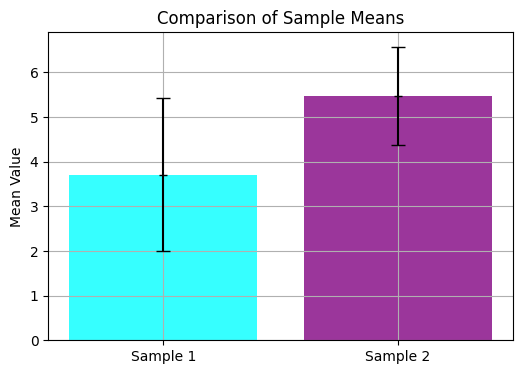

In [64]:
#The visualization part even though it wasn't specified to be included in the tasks

plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], color=['cyan', 'purple'], alpha=0.79)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1, ddof=1), np.std(data2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()